In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
y_train[0] = 5
print(y_train)
print(x_test.shape)
print(y_test.shape)
print(y_train[0])


(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
5


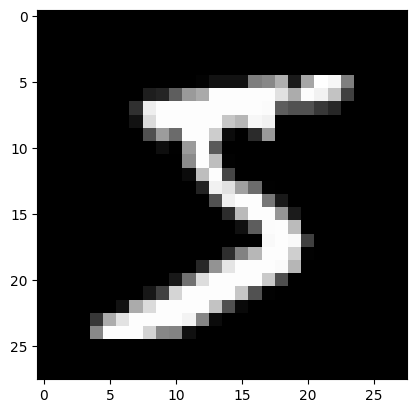

In [ ]:

plt.imshow(x_train[0], cmap='gray')
plt.show()


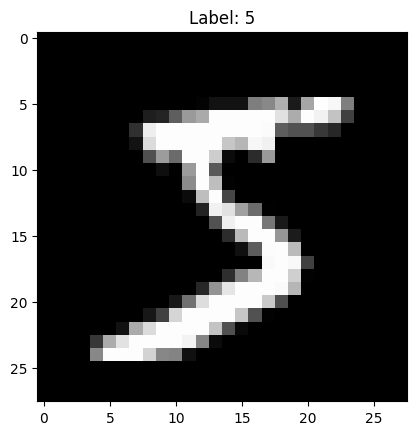

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)
x_train_flat
print(x_train.shape)
print(x_train_flat.shape)



(60000, 28, 28)
(60000, 784)


Logistic Regression Accuracy: 0.9259


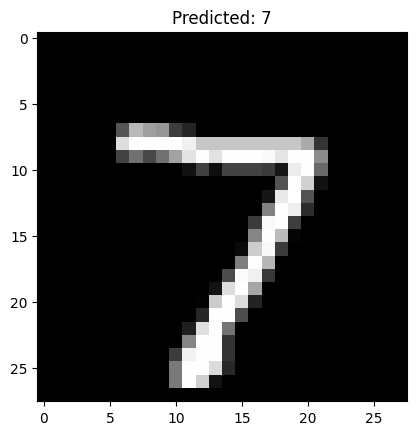

In [ ]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train_flat, y_train)

y_pred_lr = model_lr.predict(x_test_flat)

accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)

import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {y_pred_lr[0]}")
plt.show()

KNN Accuracy: 0.9688


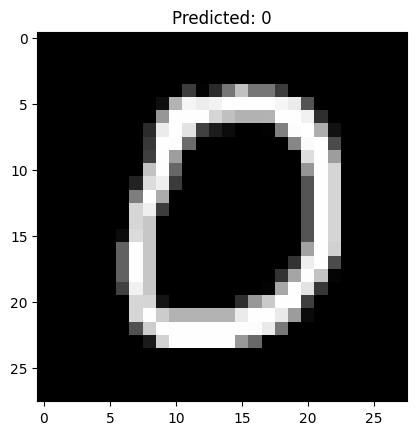

In [ ]:

model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(x_train_flat, y_train)

y_pred_knn = model_knn.predict(x_test_flat)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)

import matplotlib.pyplot as plt

plt.imshow(x_test[10], cmap='gray')
plt.title(f"Predicted: {y_pred_knn[10]}")
plt.show()


In [ ]:

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:

model_nn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_nn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model_nn.fit(
    x_train,
    y_train_cat,
    epochs=5,
    validation_data=(x_test, y_test_cat)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8740 - loss: 0.4375 - val_accuracy: 0.9584 - val_loss: 0.1425
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9653 - loss: 0.1225 - val_accuracy: 0.9723 - val_loss: 0.0905
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9764 - loss: 0.0787 - val_accuracy: 0.9738 - val_loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0595 - val_accuracy: 0.9752 - val_loss: 0.0834
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0453 - val_accuracy: 0.9769 - val_loss: 0.0758


In [ ]:
loss, accuracy_nn = model_nn.evaluate(x_test, y_test_cat)
print("Neural Network Accuracy:", accuracy_nn)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0884
Neural Network Accuracy: 0.9768999814987183


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


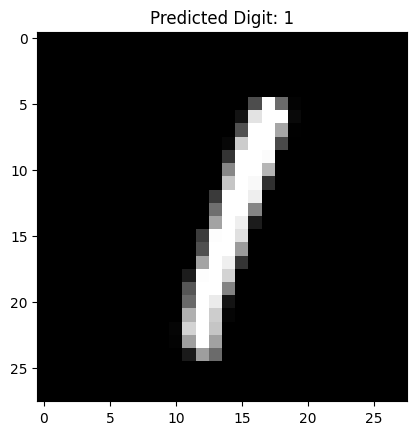

In [ ]:

image = x_test[5]
prediction = model_nn.predict(image.reshape(1, 28, 28))
digit = np.argmax(prediction)

plt.imshow(image, cmap='gray')
plt.title(f"Predicted Digit: {digit}")
plt.show()


# CNN

In [ ]:
# from tensorflow.keras.datasets import mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
# x_train = x_train / 255.0
# x_test = x_test / 255.0


In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)


In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
model_cnn = Sequential([

    # Feature Extraction
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    # Deeper Features
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Decision Making
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model_cnn.fit(
    x_train,
    y_train_cat,
    epochs=5,
    validation_data=(x_test, y_test_cat)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9127 - loss: 0.2817 - val_accuracy: 0.9839 - val_loss: 0.0510
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0407 - val_accuracy: 0.9899 - val_loss: 0.0333
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9912 - loss: 0.0280 - val_accuracy: 0.9888 - val_loss: 0.0337
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0192 - val_accuracy: 0.9911 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9906 - val_loss: 0.0319


In [ ]:
loss, accuracy_cnn = model_cnn.evaluate(x_test, y_test_cat)
print("CNN Accuracy:", accuracy_cnn)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0398
CNN Accuracy: 0.9905999898910522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


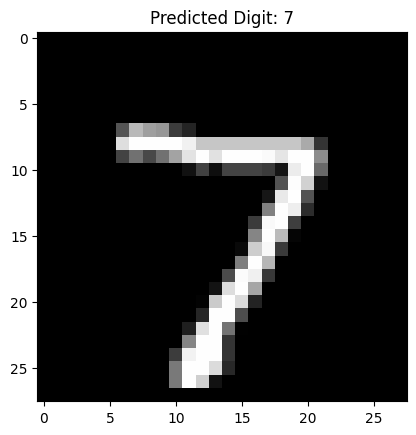

In [ ]:

image = x_test[0]

prediction = model_cnn.predict(image.reshape(1,28,28,1))
digit = np.argmax(prediction)

plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {digit}")
plt.show()


# 🔹 Confusion Matrix (Logistic / KNN)

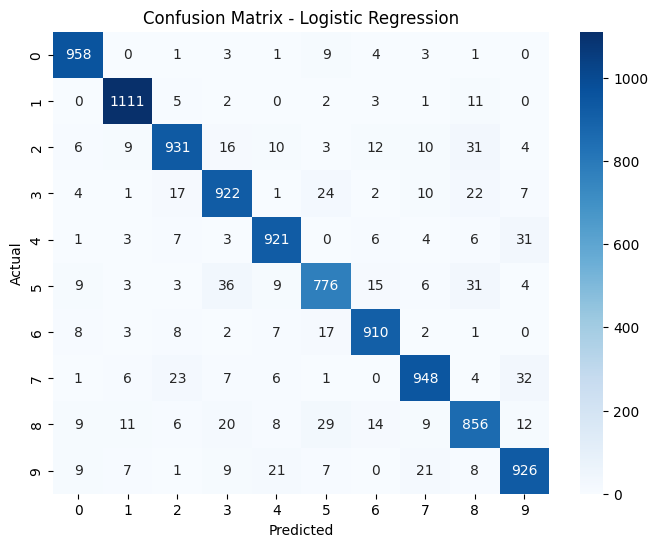

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
# y_pred_nn = model_nn.predict(x_test)
# y_pred_nn = y_pred_nn.argmax(axis=1)

# print(classification_report(y_test, y_pred_nn))
print(x_test.shape)
x_test_nn = x_test.reshape(10000, 28, 28)
print(x_test_nn.shape)


(10000, 28, 28, 1)
(10000, 28, 28)


In [ ]:
y_pred_nn = model_nn.predict(x_test_nn)
y_pred_nn = y_pred_nn.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_nn))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# CASE 2: CNN MODEL
input_shape=(28,28,1)
input_shape
print(x_test.shape)



(10000, 28, 28, 1)


In [ ]:
y_pred_cnn = model_cnn.predict(x_test)
y_pred_cnn = y_pred_cnn.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred_cnn))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



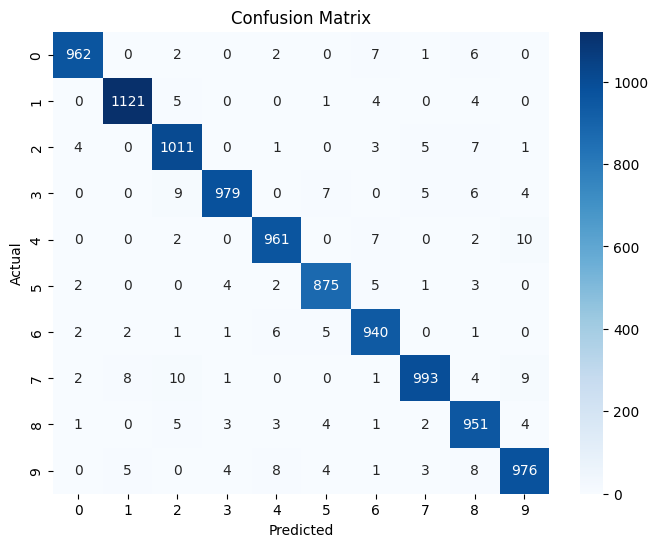

In [ ]:

cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# 1️⃣ Logistic Regression – Save & Load

In [ ]:
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model_lr, file)


In [ ]:
with open("logistic_model.pkl", "rb") as file:
    loaded_lr = pickle.load(file)


In [ ]:
pred = loaded_lr.predict(x_test_flat)
print(pred[665])


6


# 2️⃣ KNN – Save & Load

In [ ]:
with open("knn_model.pkl", "wb") as file:
    pickle.dump(model_knn, file)


In [ ]:
with open("knn_model.pkl", "rb") as file:
    loaded_knn = pickle.load(file)


In [ ]:
pred = loaded_knn.predict(x_test_flat)
print(pred[45])


5


# 3️⃣ Neural Network – Save & Load

In [ ]:
model_nn.save("neural_network_model.h5")


In [ ]:
loaded_nn = load_model("neural_network_model.h5")


In [ ]:
prediction = loaded_nn.predict(x_test[0].reshape(1,28,28))
digit = np.argmax(prediction)

print("Predicted Digit:", digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
Predicted Digit: 7


# 4️⃣ CNN – Save & Load

In [ ]:
model_cnn.save("cnn_model.h5")


In [ ]:
loaded_cnn = load_model("cnn_model.h5")


In [ ]:
prediction = loaded_cnn.predict(x_test[0].reshape(1,28,28,1))
digit = np.argmax(prediction)

print("Predicted Digit:", digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
Predicted Digit: 7
